<center><bold>Assignment 3</bold></center>
<center>Mohamed A. AbdelHamed - 900163202</center>
<center>oscar@aucegypt.edu</center>

# Overview:
Presented is a traffic sign object detector using deep learning (for *classification*) and contour search (for *segmentation*). The detector specializes in yellow-red traffic signs but can be easily generalized to other types/colors by expanding the training data and modifying the last model layer to accommodate more classes. A pretrained model (that was trained on ~445 images) is also provided and can be loaded without the need for retraining.

The main process used for detection is as follows: 
1. Turn off irrelevant colors from the image by masking the colors of interest (red + some yellow).  
2. Apply Canny edge detection over the masked image.  
3. Apply contour search on the resulting edge image to find all candidate bounding boxes that might contain signs.   
4. Apply the sign classification model to all candidate regions to get their likelihood of containing a valid sign.  
5. Filter out regions based on their likelihoods (and whether their smallest dimension is too small), and extract the ones above 50% likelihood.  
6. Union coinciding regions by assigning them a parent region.  
7. Region A represents region B iff:  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. $IOU(A, B) > 0.1$  
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. $Pr(A) >= Pr(B)$ where $Pr(A) = area(A)*P(A)*SQ(A)$ such that:  
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- P(A): likelihood of region A containing a valid sign.  
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- SQ(A): the squareness of region A, calculated as dim(A)_{min}/dim(A)_{max}  
8. The resulting representative/parent regions represent the final verdict for the bounding boxes of detected objects.  

# How to Use:  
Using the program is quite simple:  
1. In case you need to retrain the model on a different dataset:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. place the dataset inside `./train_data` with sign images under `signs` and others under `other`.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. pass the `pretrained` param of `main.run` as False.  
2. All test cases should be added to `./test_cases` directory, or any other path provided that you pass it as the `tests_path` param to `main.run()`.  
3. Run/call the ``main.run(tests_path)`` function with the following parameters:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- `tests_path`: path containing the test cases.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- `pretrained`: Boolean for whether to use the pretrained model or train a new one.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- `view_sample`: list of test ids to display.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- `verbose`: Boolean for whether to show console output or not.    
4. The resulting bounding boxes will be printed to console while the annotated images (bounding boxes drawn in green) will be saved to the `./test_results` directory.

# Sample Run:  

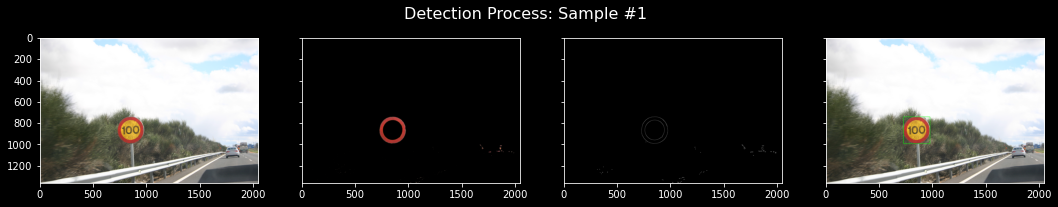

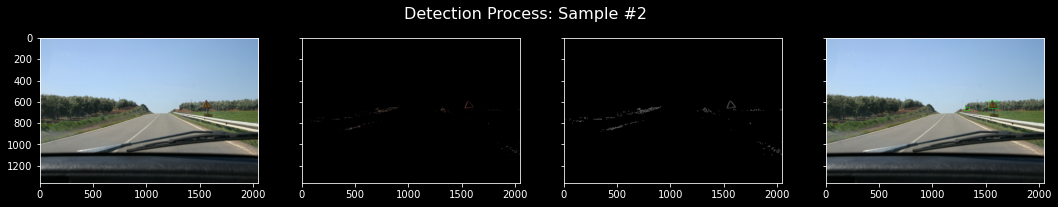

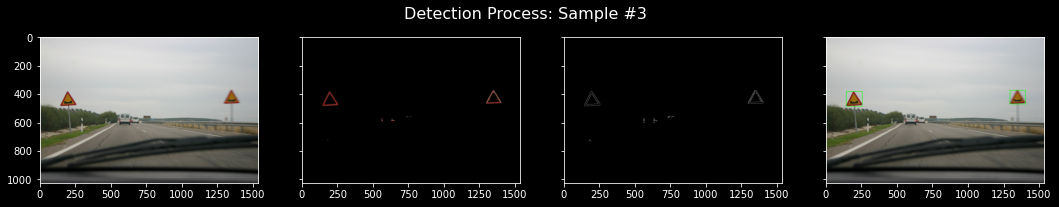

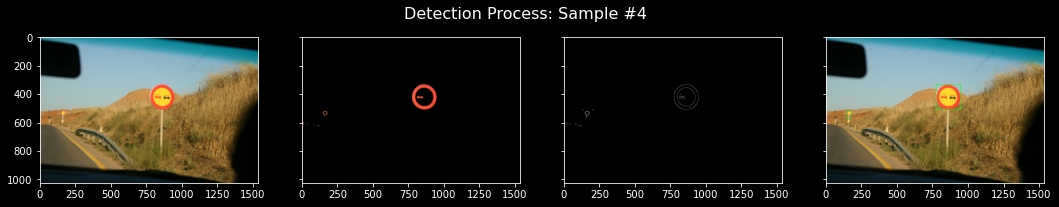

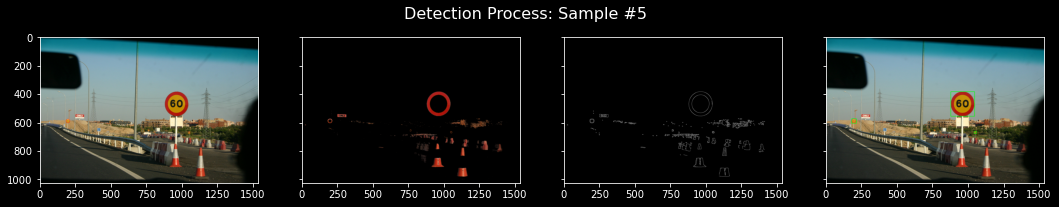

In [1]:
from main import run
run(tests_path='test_cases', pretrained=True, view_sample=[1, 2, 14, 16, 21], verbose=False)

## Performace on given tests:  
In all **25** test cases, a total of **35** valid signs were correctly detected with no false detections.